In [7]:
%matplotlib notebook

In [2]:
import dataManagement
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
import pandas as pd
from datetime import datetime
from IPython.display import display, HTML
from numpy import nan
from sklearn.covariance import EllipticEnvelope

pd.options.mode.chained_assignment = None


classifier = EllipticEnvelope(contamination=0.261)

pd.options.mode.chained_assignment = None

desiredComponents = ['AHU']

startDateTime = datetime(2017, 1, 1, hour=0, minute=0, second=0, microsecond=0)
endDateTime = datetime(2017, 1, 15, hour=0, minute=0, second=0, microsecond=0)

dataFrames = getDesiredData(desiredComponents, startDateTime, endDateTime, removeSetpoints=True, removeRequests=True, removeBooleans=True)

df = dataFrames['AHUReadings']

display(df.head())

Connection to mysql+mysqldb://localhost:3306/HVAC2 successfull
2017-01-01 00:00:00 2017-01-15 00:00:00 [<class 'hvacDBMapping.AHUReading'>]


,AHUNumber,mixedAirTemperature,outsideAirTemperature,returnAirTemperature,staticPressureSmoothed,staticSP,supplyAirTemperature
timestamp,,,,,,,
2017-01-01 00:00:00,5,64.5,53.2,63.7,0.8522,0.875,70.6
2017-01-01 00:05:00,5,66.4,53.1,63.5,0.8746,0.875,61.6
2017-01-01 00:10:00,5,58.7,53.0,63.2,0.8776,0.875,63.3
2017-01-01 00:15:00,5,60.0,52.9,63.4,0.8589,0.875,61.5
2017-01-01 00:20:00,5,67.0,70.4,63.2,0.8964,0.875,69.3


In [1]:
def getDesiredData(desiredComponents, startDateTime, endDateTime, removeSetpoints=False, removeRequests=False, removeBooleans=False):
    """Get the data from the desired components at the specified dates. After retrieval, clean and reshape the dataframes
    to disregard unuseful data such as setpoints and requestpoints. Return the cleaned dataframes"""

    #Get the desired data and clean it
    dataFrames = dataManagement.loadData(startDateTime, endDateTime, desiredComponents)

    for key in dataFrames:
        df = dataFrames[key]
        dataFrames[key] = dataManagement.reshapeAndCleanDataFrame(df, removeSetpoints=removeSetpoints, removeRequests=removeRequests, removeBooleans=removeBooleans)

    return dataFrames

<IPython.core.display.Javascript object>


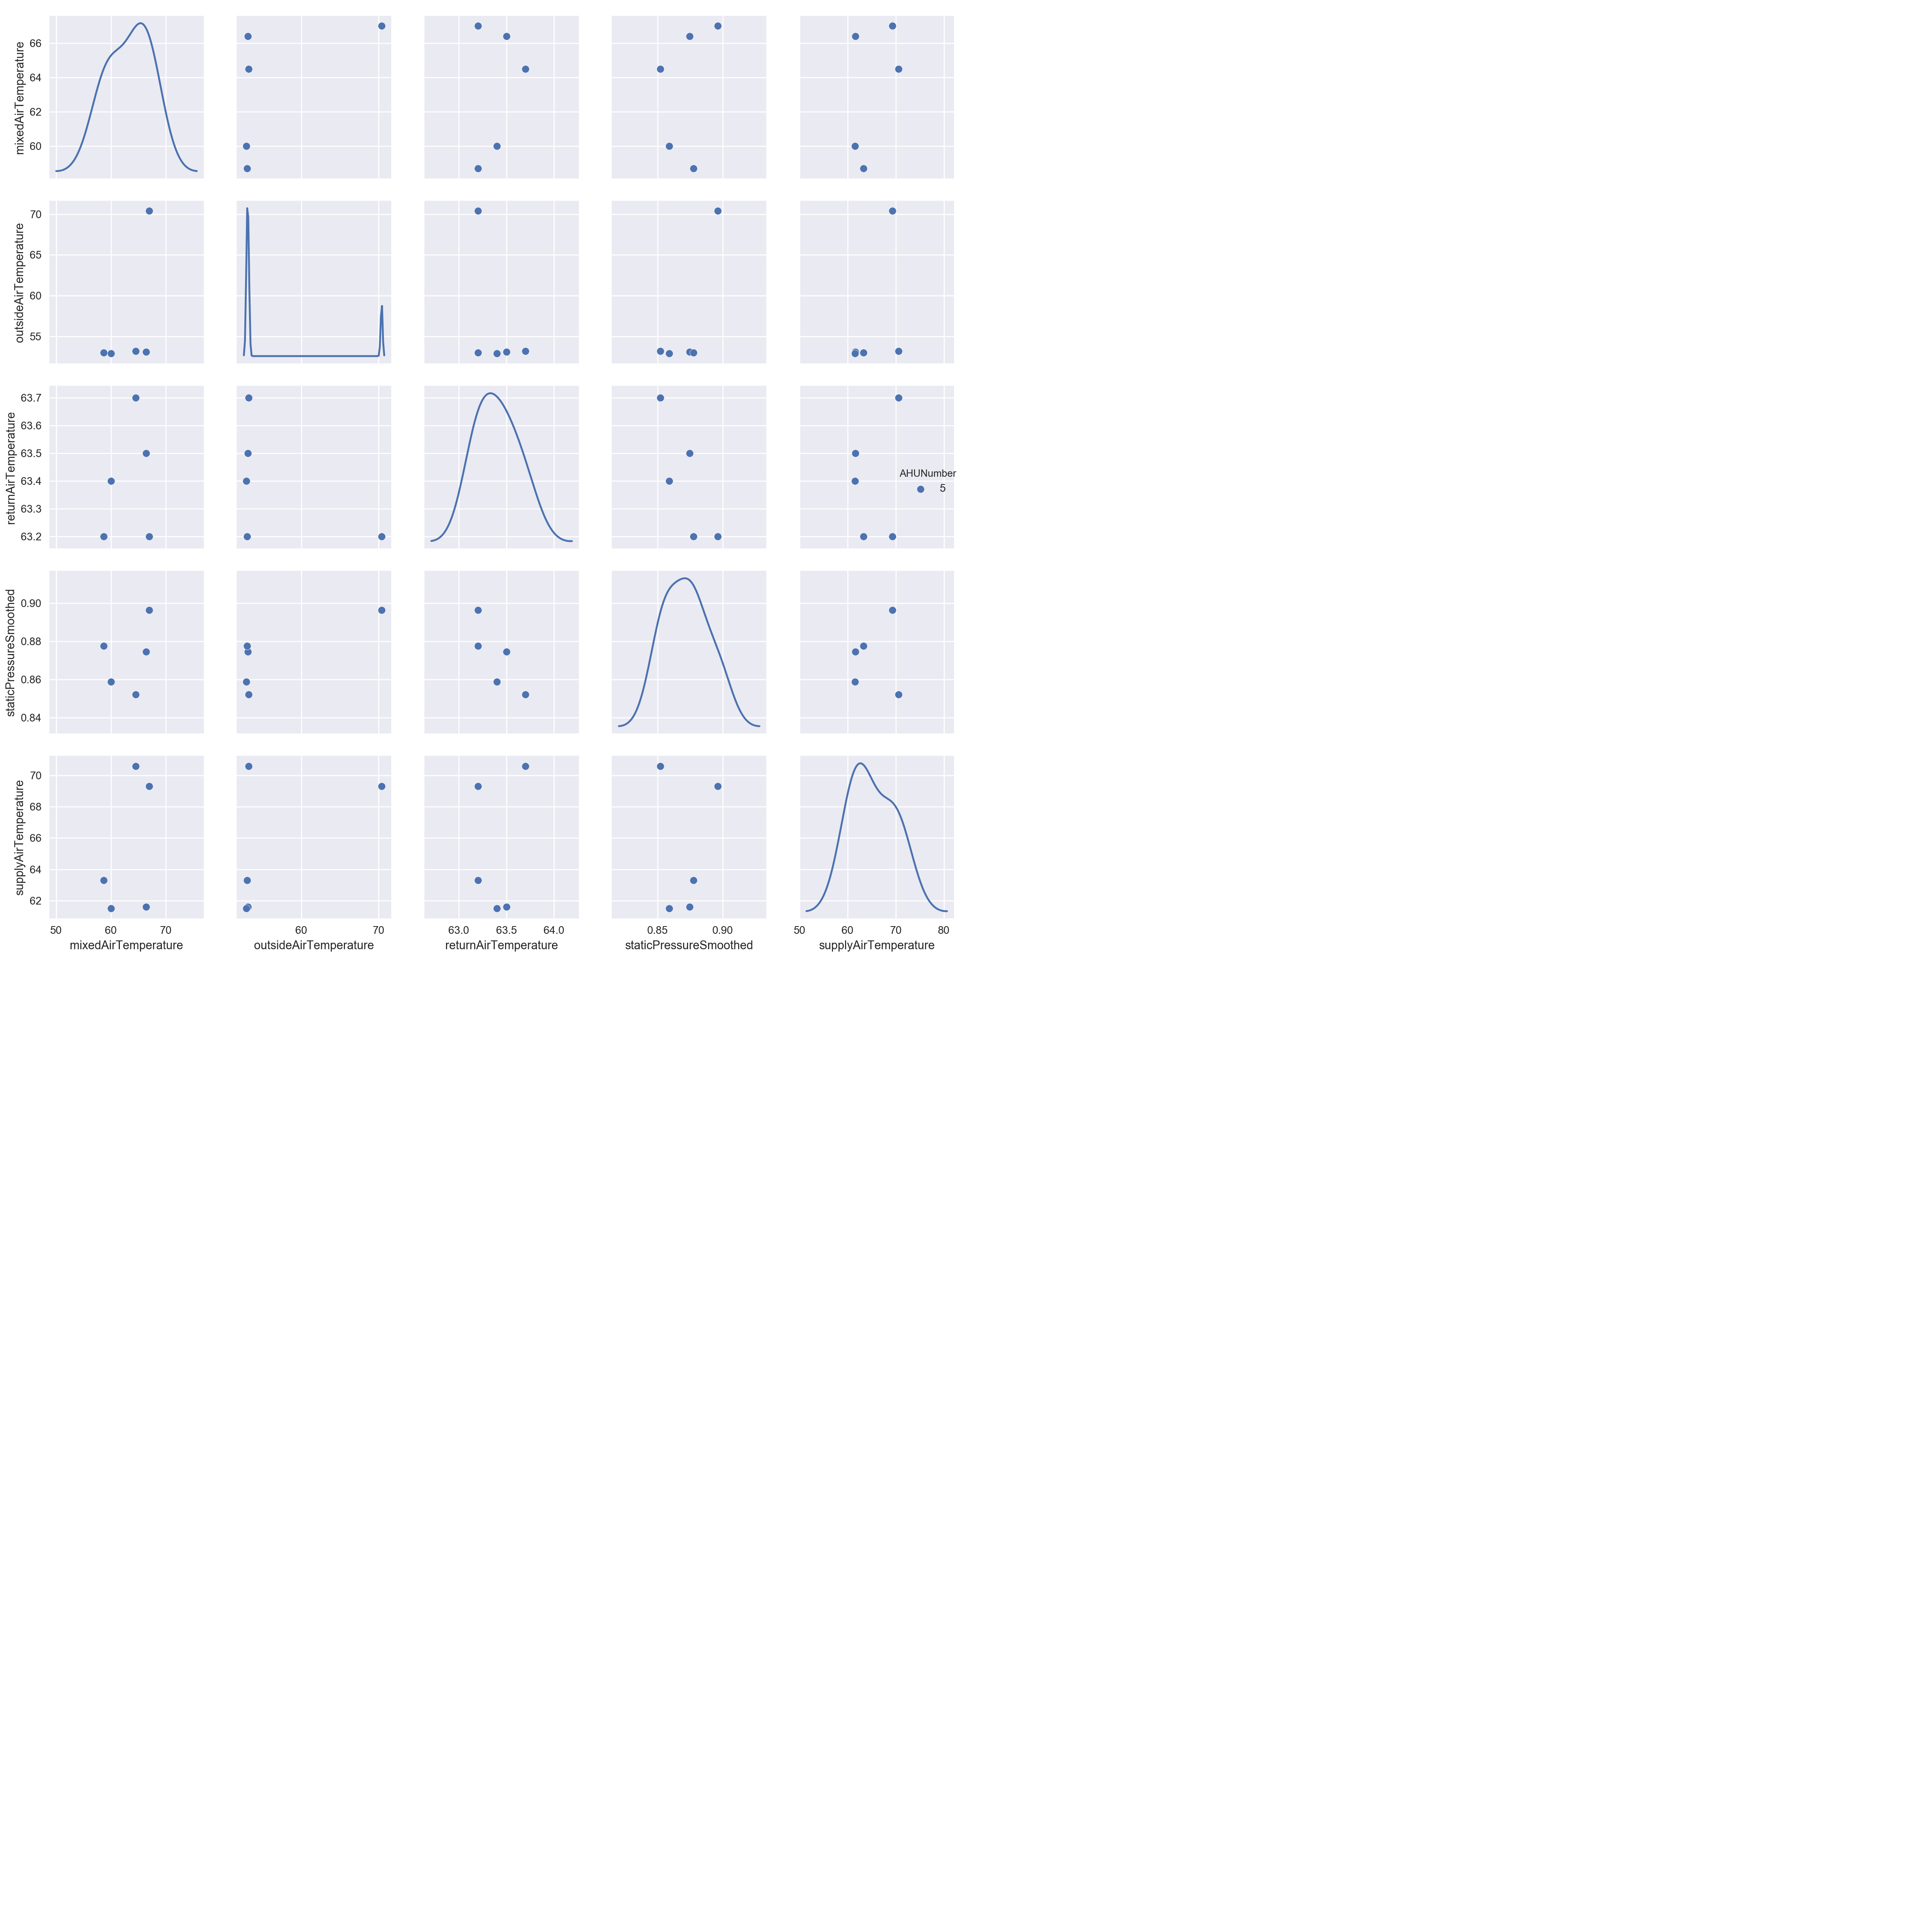